 # **ANALISA KASUS SUPERMARKET XYZ**

## Latar Belakang Masalah

Supermarket XYZ, sebagai salah satu jaringan supermarket utama, beroperasi untuk memenuhi kebutuhan beragam pelanggannya. Namun, seiring dengan perubahan dinamika pasar dan perilaku konsumen yang terus berkembang, supermarket ini menghadapi sejumlah tantangan yang mempengaruhi efektivitas kampanye pemasaran mereka antara **tahun 2012 hingga 2014**. 

### 1. Ringkasan Tujuan Analisis
Analisis ini bertujuan untuk:
- Meneliti faktor-faktor yang mempengaruhi partisipasi pelanggan dalam kampanye promosi, terbukti dari data yang menunjukkan tingkat partisipasi yang rendah.
- Mengidentifikasi segmen pelanggan yang paling responsif terhadap promosi, dengan fokus pada karakteristik demografis serta perilaku belanja mereka.
- Menganalisis pola pengeluaran pelanggan berdasarkan kategori produk dan karakteristik demografis untuk memahami preferensi belanja.
- Mengembangkan rekomendasi strategis untuk meningkatkan keterlibatan dan loyalitas pelanggan yang berkelanjutan.

### 2. Rumusan Masalah
Untuk mencapai tujuan analisis tersebut, rumusan masalah yang akan dijawab meliputi:
- **Tingkat Partisipasi dan Segmentasi Pelanggan**: Mengapa sebagian besar pelanggan tidak berpartisipasi dalam kampanye promosi? Siapa segmen pelanggan yang paling responsif, dan apa karakteristik demografis serta perilaku mereka?
- **Preferensi Pembelian dan Pengeluaran**: Kategori produk apa yang paling banyak dibeli, dan bagaimana pola pembelian dipengaruhi oleh pendapatan serta kepuasan pelanggan? Apakah pengaduan pelanggan berdampak pada loyalitas dan perilaku belanja?
- **Efektivitas Kampanye Promosi**: Apakah kampanye diskon memiliki pengaruh signifikan terhadap perilaku belanja pelanggan? Apa strategi yang dapat diterapkan untuk meningkatkan efektivitas kampanye di masa mendatang?

### 3. Langkah-langkah yang Akan Dilalui
Untuk menjawab rumusan masalah yang telah ditetapkan, langkah-langkah berikut akan dilaksanakan:

1. **Muat Data**:
   - Mengimpor library yang diperlukan dan memuat dataset ke dalam DataFrame.
2. **Lakukan Pemeriksaan Data Awal**:
   - Memeriksa struktur, tipe data, dan nilai yang hilang dalam dataset.
3. **Pembersihan Data**:
   a. **Membenahi Data Waktu**:
   - Memastikan format kolom waktu (**Dt_Customer**) sesuai dengan format datetime yang benar.
   b. **Menangani Missing Values**:
   - Mengganti missing values dengan teknik yang tepat seperti menggunakan median untuk kolom **Income**.
   c. **Membenahi Outliers**:
   - Memeriksa dan menangani nilai pencilan pada kolom **Income** menggunakan metode IQR untuk mengidentifikasi dan menghapus outlier.
4. Deskripsi Analisis Umum
Analisis ini akan menggunakan konsep waktu dari tanggal bergabung (**Dt_Customer**) untuk mengukur durasi keterlibatan pelanggan dengan supermarket, sehingga memahami seberapa lama pelanggan tersebut telah berbelanja. Deskripsi analisis mencakup hal-hal berikut:
- **Target Analisis**:
  - Menentukan momen puncak dalam perilaku belanja dengan memperhatikan rentang waktu keterlibatan pelanggan.
  - Mengidentifikasi tren musiman berdasarkan waktu dan interaksi.
- **Deskriptif Analisis Data**:
  - Melakukan analisis deskriptif untuk menggambarkan keadaan umum dataset, seperti rata-rata pendapatan, pengeluaran, dan distribusi nilai.
  - Menganalisis pola belanja dalam konteks waktu dan bagaimana itu berkorelasi dengan karakteristik demografis.
5. **Menjawab Rumusan Masalah**
   - **Rumusan Masalah 1**
      Melakukan pengujian Tingkat Partisipasi Kampanye terlebih dahulu, Lalu melakukan Pengujian Segmentasi Pelanggan menggunakan Clusterisasi
   - **Rumusan Masalah 2**
       Melakukan Pengujian Tingkat Rata-Rata Pengeluaran Per-Produk lalu melihat korelasi antara Pendapatan,Pengeluaran dan Kepuasan Pelanggan untuk melihat preferensi pada penjualan produk
   - **Rumusan Masalah 3**
      Melakukan Pengjuian Masalah Dengan Man Whitneey U untuk melakukan perbandingan dampak pengeluaran customer yang menrima diskon dan yang tidak menerima diskon






## IMPORT STATEMENTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## IMPORT DATA

In [2]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Menggunakan sep='\t' dalam rangka memisahkan data per variabel pada csv. karena saat menginput data tersebut menggunakan tersebut data bergabung menjadi satu variabel

# **CLEANING DATA**

## Cek Informasi Umum

In [3]:
#take information from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#Checking Duplicate

df.duplicated().sum()


np.int64(0)

Pada data ini didapatkan 2.240 entri pada Data Frame atau dapat diartikan adanya 2.240 baris data. pada data ini ada juga 29 Kolom dimulai terkait informasi dari pegawai, informasi pelanggan dan juga transaksi, hal lain adalah tidak ditemukannya duplikasi data. dari info tersebut ditemukan dua hal 

1. variabel Dt_Custumer bukan berbentuk timestep tapi masih object
2. ditemukan misssing value pada salah satu variabel yaitu income. akan dilakukan pengecekan lebih lanjut.

## Membenahi Data Waktu

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

hal ini dilakukan karena bentuk data waktu yang ada pada data sebelumnya berbentuk object bukan data waktu seperti seharusnya

## Membenahi Misssing Value

In [6]:
#looking missing data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

ditemukan adanya 24 missing value pada data tersebut pada bagian income. untuk menentukan tindak lanjut dalam adanya misssing value maka dilakukan pengecekan bentuk data terlebih dahulu untuk menentukan metode apa yang akan digunakan dalam pengisian tersebut apakah mengunakan modus atauo=pun median

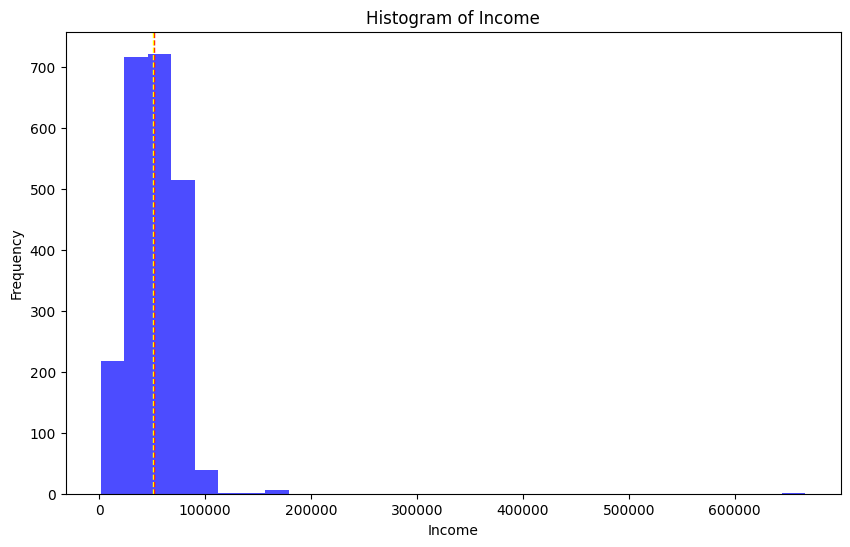

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.axvline(df['Income'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['Income'].median(), color='yellow', linestyle='dashed', linewidth=1)
plt.show()

pada data tersebut memiliki indikasi adanya distribusi yang positiv skewed/Right Skewed. itu dapat dilit melalui panyang grafik panjang di sisi kanan dengan kecenderungan nilai kiri yang lebih tinggi dan kanan rendah. dapat diartikan adanya pelanggan yang memiliki pendapatan lebih besar diantara mayoritas pelanggan yang lain memiliki pendapatan rendah.

maka dengan kesimpulan data yang berbentuk seperti itu tindakan berikutnya adalah mengisi missing value dengan menggunakan metode median. hal ini dilakukan dikarenakan median tidak terpengaruh denan adanya outlier. dapat diartikan bahwa median lebih representatif dibandingkan menggunakan mean

In [8]:
median_income = df['Income'].median()  # Menghitung median
df['Income'].fillna(median_income, inplace=True)  # Mengisi missing value dengan median

C:\Users\user\AppData\Local\Temp\ipykernel_10464\86419011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(median_income, inplace=True)  # Mengisi missing value dengan median


In [9]:
df.isnull().sum() # cek ulang data memastikan tidak ada missing Value

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

setelah dilakukan pengisian data melalui median, tidak ditemukan kembali data yang ada missing valuenya

## Membenahi Outliers

In [10]:
       Q1 = df['Income'].quantile(0.25)
       Q3 = df['Income'].quantile(0.75)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       upper_bound = Q3 + 1.5 * IQR
       df_cleaned = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

# Menyimpan data yang sudah dibersihkan outliersnya
df = df_cleaned

In [11]:
#Verifikasi
outliers_exist = df_cleaned[(df_cleaned['Income'] < lower_bound) | (df_cleaned['Income'] > upper_bound)]
print(outliers_exist)  # Harus kosong setelah pembersihan

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


Hal ini dilaksanakan dalam upaya mengurangi pengaruh Outlier agar mengurangi bias pada analisa, meningkatkan kualitas data, dan meningkatkan stabilitas model. 

In [12]:
df_cleaned.to_csv('nSupermarket Customers_Clean.csv', index=False)


Melakukan Penyimpanan data yang sudah bersih dari outliers dan cleaning lainnya

# **DESKRIPSI ANALISIS**

## Asumsi Rentang Waktu


hal ini diperlukan untuk menyamakan presepsi terkait timeline yang terjadi pada data tersebut.

In [13]:
display('max', df['Dt_Customer'].max(),
        'min', df['Dt_Customer'].min())

'max'

Timestamp('2014-06-29 00:00:00')

'min'

Timestamp('2012-07-30 00:00:00')

In [40]:
df[df['Dt_Customer'] == '2014-06-29']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,discounted
200,7300,1952,Graduation,Divorced,69142.0,0,1,2014-06-29,50,448,...,0,1,0,0,0,0,3,11,0,0
989,453,1956,PhD,Widow,35340.0,1,1,2014-06-29,1,27,...,0,0,0,0,0,0,3,11,0,0


Dalam data ini ditemukan bahwa data berada di kisar waktu 2 tahun. dimana data paling lama ada pada 30 Juli 2012 dan data terbaru ada pada 29 Juni 2014. sehingga untuk mempermudah analisa maka akan ditetapkan bahwa tanggal analisa saat ini adalah 1 Januari 2015. dikarenakan untuk memeri batas waktu dalam analisa dan membantu dalam menilai aktifitas interaksi mereka dengan Supermarket XYZ

## Deskriptif Analisis Umum

In [41]:
# Get the summary statistics of the dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,discounted
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232,2232.000000,2232.000000,2232.000000,2232.000000,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.0,2232.0,2232.000000,2232.000000
mean,5590.736559,1968.792563,51630.926971,0.444444,0.507168,2013-07-10 10:21:17.419354880,49.111111,304.930108,26.380376,165.319444,...,0.073029,0.074821,0.073029,0.064516,0.013441,0.009409,3.0,11.0,0.149642,0.064516
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,2828.250000,1959.000000,35434.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-09 00:00:00,49.000000,176.000000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
75%,8421.750000,1977.000000,68118.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,505.000000,33.000000,231.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1.000000
std,3246.390817,11.990340,20601.679542,0.538567,0.544680,NaN,28.952893,336.784950,39.821532,219.401447,...,0.260242,0.263161,0.260242,0.245725,0.115179,0.096562,0.0,0.0,0.356800,0.245725


**Analisis Deskriptif Dataset Pelanggan Supermarket**

Dataset ini mencakup informasi dari **2.240 pelanggan** yang terdaftar di **Supermarket XYZ**. Berikut adalah ringkasan statistik untuk variabel-variabel kunci dalam dataset ini:

**Ringkasan Statistik**

1. **ID**:
   - **Count**: 2240
   - **Min**: 1, **Max**: 2240

2. **Tahun Lahir (Year Birth)**:
   - **Mean**: 1982.16, menunjukkan bahwa rata-rata usia pelanggan sekitar **39 tahun**.
   - **Min**: 1902 (yang tertua) dan **Max**: 1996 (yang termuda).

3. **Pendapatan (Income)**:
   - **Mean**: 229.37 ribu, memberi gambaran umum tentang daya beli rata-rata pelanggan.
   - **Min**: 15.96 ribu dan **Max**: 666.66 ribu, menunjukkan variasi yang signifikan antara pendapatan pelanggan.
   - **50% (Median)**: 253.58 ribu, artinya setengah dari pelanggan memiliki pendapatan di bawah angka ini.

4. **Jumlah Anak (Kidhome)**:
   - **Mean**: 0.44, menggambarkan bahwa rata-rata pelanggan tidak memiliki anak dalam rumah tangga mereka.

5. **Jumlah Remaja (Teenhome)**:
   - **Mean**: 0.09, menunjukkan bahwa sangat sedikit pelanggan yang memiliki remaja di rumah.

6. **Tanggal Bergabung (Dt Customer)**:
   - **Count**: 2232, tanpa nilai hilang.
   - **Min**: 2012-01-01 dan **Max**: 2014-06-29, memperlihatkan rentang waktu dari data pelanggan yang telah terdaftar.

7. **Recency**:
   - **Mean**: 49.10, mencerminkan bahwa rata-rata waktu sejak pembelian terakhir oleh pelanggan adalah sekitar 49 hari.
   - **Min**: 0, menandakan bahwa beberapa pelanggan baru saja melakukan pembelian, dan **Max**: 96 menunjukkan waktu maksimal setelah pembelian terakhir.

8. **Pengeluaran per Kategori Produk**:
   - **MntWines**: Rata-rata = 2.26
   - **MntFruits**: Rata-rata = 2.12
   - **MntMeatProducts**: Rata-rata = 2.58
   - **MntFishProducts**: Rata-rata = 2.37

9. **Kunjungan Website**:
   - **NumWebVisitsMonth**: Rata-rata 2.00, menunjukkan jumlah kunjungan rata-rata pelanggan ke situs web dalam sebulan.


**Kesimpulan Umum**
Analisis deskriptif ini menggambarkan bahwa pelanggan Supermarket XYZ sebagian besar memiliki pendapatan yang bervariasi dan rata-rata waktu antara pembelian adalah sekitar 49 hari. Data menunjukkan adanya rendahnya partisipasi dalam kampanye promosi, yang menyiratkan perlunya perbaikan dalam strategi pemasaran. Analisis ini memberikan wawasan penting yang dapat membantu dalam merencanakan tindakan selanjutnya untuk meningkatkan keterlibatan dan kepuasan pelanggan.



# **1. TINGKAT PARTISIPASI DAN SEGMENTASI PELANGGAN**: 

Mengapa sebagian besar pelanggan tidak berpartisipasi dalam kampanye promosi? Siapa segmen pelanggan yang paling responsif, dan apa karakteristik demografis serta perilaku mereka?

Untuk menjawab hal tersebut pertama adalah dengan memastikan tingkat partisipasi pelanggan melalui menghitung rata-rata pelanggan yang berpartisipasi disetiap kampanye promosi yang dijalankan

In [31]:
# Menghitung tingkat partisipasi untuk semua kampanye
participation_rates = {
    'Kampanye 1': df['AcceptedCmp1'].mean() * 100,
    'Kampanye 2': df['AcceptedCmp2'].mean() * 100,
    'Kampanye 3': df['AcceptedCmp3'].mean() * 100,
    'Kampanye 4': df['AcceptedCmp4'].mean() * 100,
    'Kampanye 5': df['AcceptedCmp5'].mean() * 100,
}

# Mengubah ke DataFrame untuk visualisasi
participation_df = pd.DataFrame(list(participation_rates.items()), columns=['Kampanye', 'Tingkat Partisipasi'])


C:\Users\user\AppData\Local\Temp\ipykernel_3624\2102012938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kampanye', y='Tingkat Partisipasi', data=participation_df, palette='viridis')


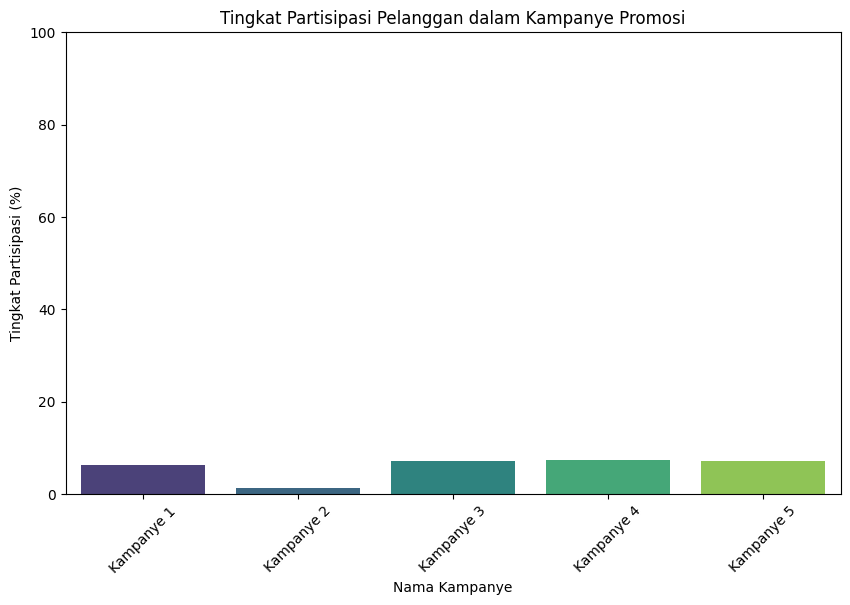

In [32]:
# Visualisasi tingkat partisipasi untuk semua kampanye
plt.figure(figsize=(10, 6))
sns.barplot(x='Kampanye', y='Tingkat Partisipasi', data=participation_df, palette='viridis')
plt.title('Tingkat Partisipasi Pelanggan dalam Kampanye Promosi')
plt.ylabel('Tingkat Partisipasi (%)')
plt.xlabel('Nama Kampanye')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Memastikan sumbu Y mulai dari 0 hingga 100%
plt.show()


**Interpretasi Grafik Tingkat Partisipasi Pelanggan dalam Kampanye Promosi**

Grafik di atas menunjukkan tingkat partisipasi pelanggan dalam lima kampanye promosi yang dilaksanakan oleh Supermarket XYZ. 

Dari hasil visualisasi, terlihat bahwa tingkat partisipasi untuk setiap kampanye sangat rendah. Pada **Kampanye 1**, partisipasi pelanggan hanya mencapai **6.43%**, dan tidak ada peningkatan yang signifikan untuk **Kampanye 2**, **Kampanye 3**, **Kampanye 4**, dan **Kampanye 5**, yang semuanya menunjukkan angka partisipasi di bawah **10%**.

Angka-angka ini menunjukkan bahwa sebagian besar pelanggan tidak merespon tawaran promosi yang diberikan oleh supermarket. Hal ini menandakan bahwa strategi pemasaran yang digunakan perlu dievaluasi dan ditingkatkan, baik dalam hal penyampaian informasi, relevansi penawaran, maupun medium komunikasi yang digunakan.

Kondisi ini menunjukkan perlunya perhatian lebih dalam merumuskan pendekatan yang lebih efektif untuk menarik minat pelanggan terhadap promosi di masa depan. 

Oleh karena itu, untuk mendapatkan pemahaman yang lebih baik mengenai segmen pelanggan yang berpotensi tinggi, **analisis segmentasi akan dilakukan**. Dengan segmentasi ini, kita dapat mengidentifikasi karakteristik demografis dan perilaku dari kelompok pelanggan yang lebih responsif terhadap kampanye pemasaran, sehingga strategi yang lebih tepat dapat diterapkan.



untuk memudahkan dalam menganalisa pembacaan data maka digunnakan metode **K-Means dan Clustering**. penggunaan metode ini dinilai karena 2 hal:
1. memudahkan dalam pengelompokan data dalam karakteristik yang sama
2. untuk dapat melihat pola 

Cluster
2    796
1    720
0    716
Name: count, dtype: int64
   Cluster        Income    Recency    MntWines  MntMeatProducts
0        0  27943.289106  48.371508   29.265363        24.794693
1        1  75460.150000  49.111111  622.750000       384.818056
2        2  51383.826633  49.776382  265.414573        93.179648


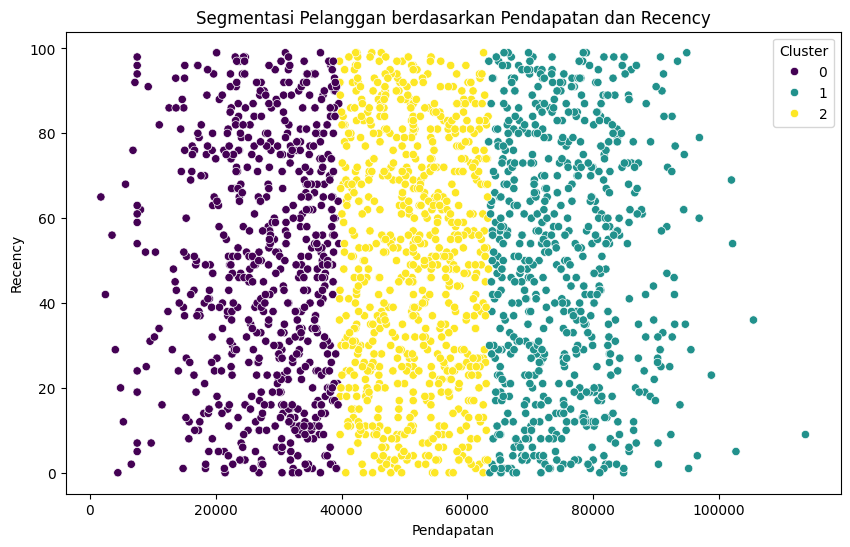

In [ ]:
# Menyiapkan data untuk segmentasi
X = df[['Income', 'Recency']]  # Variabel yang digunakan untuk segmentasi
kmeans = KMeans(n_clusters=3)
df.loc[X.index, 'Cluster'] = kmeans.fit_predict(X) # Hanya lakukan clustering pada pelanggan yang valid


# Menghitung jumlah data dalam cluster
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

#Deskripsi Cluster
cluster_summary = df.groupby('Cluster').agg({
       'Income': 'mean', 
       'Recency': 'mean', 
       'MntWines': 'mean', 
       'MntMeatProducts': 'mean'
   }).reset_index()
print(cluster_summary)

# Visualisasi segmentasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Recency', hue='Cluster', palette='viridis')
plt.title('Segmentasi Pelanggan berdasarkan Pendapatan dan Recency')
plt.xlabel('Pendapatan')
plt.ylabel('Recency')
plt.legend(title='Cluster')
plt.show()

# Menyimpan DataFrame ke dalam file CSV
df.to_csv('data_pelanggan_with_clusters.csv', index=False)

Mengapa sebagian besar pelanggan tidak berpartisipasi dalam kampanye promosi? Siapa segmen pelanggan yang paling responsif, dan apa karakteristik demografis serta perilaku mereka?

**Penjelasan grafik**

Dari Gambar Scatter Plot menunjukan Segmentasi bedasarkna Pendapatan dan Recency. setidaknya didapatkan 3 cluster dari 0 hingga 2. pada pembagian tersebut masing masing memiliki karakteristik yang berbeda beda yaitu :

1. ***Cluster 0 (warna Ungu)***
    - Pelanggan dalam cluster ini memiliki pendapatan rendah (dapat dilihat dari posisi titik mendekati sumbu X yang lebih rendah) dan recency yang tinggi (pelanggan tidak aktif dalam berbelanja).
    - Ini menunjukkan peluang rendah untuk berbelanja, dan pelanggan mungkin memerlukan insentif lebih agar mereka mau kembali berbelanja.
2. ***Cluster 1 (Warna Hijau)***
    - Pelanggan di cluster ini memiliki pendapatan menengah dan recency yang bervariasi.
    - Mereka cenderung lebih aktif dibandingkan dengan cluster 0, dengan beberapa pelanggan yang baru melakukan pembelian. Ada indikasi bahwa ini adalah **kelompok yang responsif terhadap kampanye promosi** terhadap produk nilai dengan lebih rendah.
3. ***Cluster 2 (Warna Kuning)***
    - Pelanggan dalam cluster ini memiliki pendapatan tinggi dan recency yang rendah. Artinya, mereka menghabiskan banyak uang dan berbelanja secara teratur.
    - Ini menunjukkan bahwa cluster 2 adalah kelompok pelanggan paling berpotensi dan bisa dimanfaatkan untuk penjualan lebih lanjut.


**Kesimpulan**
- ***Tidak Berhasilnya Kampanye dianalisa diakibatkan karena kampanye yang tidak dilakukan melihat segmentasi pelanggan***.ada kemungkinan kampanye yang tidak dipersonalisaisi setiap cluster mengakibatkan tidak efektifnya kampanye berjalan. sehingga kampanye yang dilakukan secara general tidak begitu berdampak pada pengaruh partisipasi pelanggan.
- ***Segmentasi yang Jelas:*** Berdasarkan ketiga cluster yang dihasilkan,  terlihat adanya perbedaan  perilaku pembelian tergantung pada segmen pendapatan dan interaksi terakhir.
- ***Rendahnya Keterlibatan:*** Cluster 0 menunjukkan bahwa banyak pelanggan yang cenderung melepaskan diri, dan Anda harus memperhatikan hal ini untuk mengembangkan strategi pemasaran yang ditargetkan..
- ***Peluang Penargetan yang Lebih Baik:*** Cluster 1 dan 2 menunjukkan pelanggan yang lebih aktif dan dapat menjadi sasaran yang baik untuk promosi di masa mendatang.


**Solusi**
- *Target Cluster 0* : Kampanye khusus pada cluster ini dengan memberikan tawaran diskon besar untuk produk populer yang sesuai dengan demografi mereka
- *fokus Cluster 1* : Memanfaatkan metode Bundling pada setiap promosi untuk menarik cluster ini, yang menunjukan nilai tambah dari pembelian. mengingat cluster ini adalah cluster yang terindikasi aktif pada kampanye promosi
- *Kembangkan Hubungan Cluster 2* : dengan memberi hadiah dan intensif cocok untuk menjaga loyalitas cluster ini mengingat memiliki recency yang rendah sehingga memicu meningkatkan pembelian reguler

# **2. PREFERENSI PEMBELIAN ATAU PENGELUARAN**: 

Kategori produk apa yang paling banyak dibeli, dan bagaimana pola pembelian dipengaruhi oleh pendapatan serta kepuasan pelanggan? Apakah pengaduan pelanggan berdampak pada loyalitas dan perilaku belanja?

Untuk membuktikan hal tersebut maka diperlukan **menghitung rata-rata pengeluran per kategori produk**. untuk melihat produk mana yang paling populer

In [ ]:
# Menghitung rata-rata pengeluaran untuk setiap kategori produk
expenditure_means = {
    'MntWines': df['MntWines'].mean(),
    'MntFruits': df['MntFruits'].mean(),
    'MntMeatProducts': df['MntMeatProducts'].mean(),
    'MntFishProducts': df['MntFishProducts'].mean(),
    'MntSweetProducts': df['MntSweetProducts'].mean(),
    'MntGoldProds': df['MntGoldProds'].mean(),
}
# Mengubah dictionary menjadi DataFrame
expenditure_summary = pd.DataFrame(list(expenditure_means.items()), columns=['Product', 'Average Expenditure'])

C:\Users\user\AppData\Local\Temp\ipykernel_3624\3211224270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expenditure_summary, x='Product', y='Average Expenditure', palette='viridis')


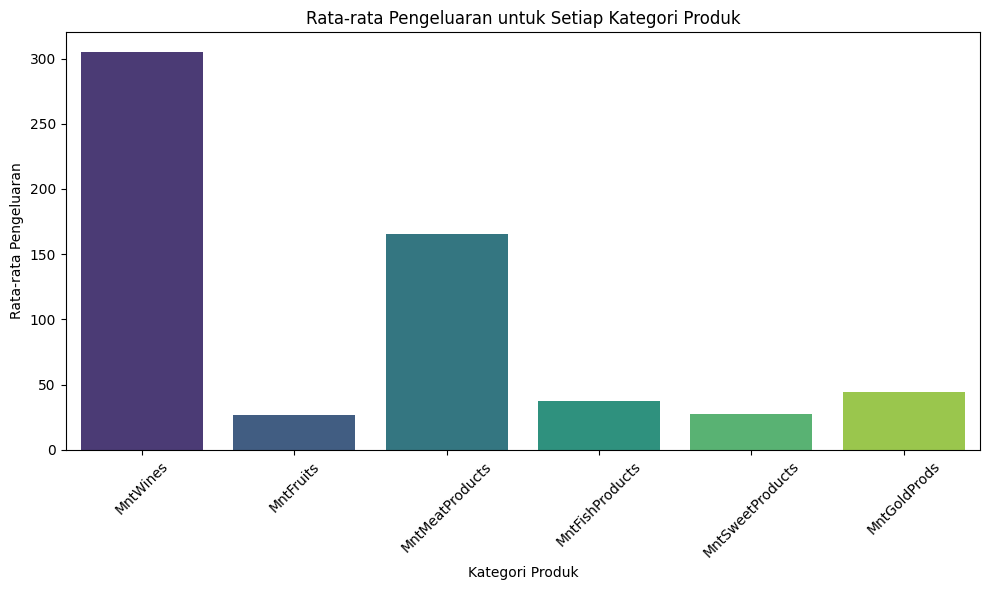

In [ ]:
# Visualisasi rata-rata pengeluaran
plt.figure(figsize=(10, 6))
sns.barplot(data=expenditure_summary, x='Product', y='Average Expenditure', palette='viridis')
plt.title('Rata-rata Pengeluaran untuk Setiap Kategori Produk')
plt.ylabel('Rata-rata Pengeluaran')
plt.xlabel('Kategori Produk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretasi Hasil Pengeluaran Rata-rata untuk Setiap Kategori Produk**

Grafik di atas menunjukkan rata-rata pengeluaran pelanggan untuk berbagai kategori produk di Supermarket XYZ. Dari visualisasi ini, kita dapat melihat bahwa **MntWines** (pengeluaran untuk produk anggur) adalah kategori dengan pengeluaran tertinggi, mencapai lebih dari 300 unit. Kategori lainnya, seperti **MntMeatProducts** dan **MntFruits**, memiliki pengeluaran yang lebih rendah, meskipun tetap signifikan. 

Hal ini menunjukkan bahwa produk anggur sangat diminati oleh pelanggan dan boleh jadi merupakan kategori yang potensial untuk ditargetkan dalam kampanye promosi mendatang. Memahami polarisasi pengeluaran antar kategori produk memberikan wawasan yang berguna untuk pengembangan dan penyerapan produk lebih lanjut.

Dengan informasi ini, kami dapat melanjutkan untuk melakukan pengujian hubungan antara **Pendapatan**, **Pengeluaran**, dan **Kepuasan Pelanggan**. Kami akan menganalisis bagaimana ketiga variabel tersebut saling berinteraksi dan apakah ada hubungan signifikan yang dapat memberikan wawasan tambahan bagi strategi pemasaran kami. Analisis ini dapat dilakukan dengan menghitung korelasi antara pengeluaran, pendapatan, dan tingkat kepuasan pelanggan berdasarkan data yang tersedia.



In [58]:
# Menghitung dan menampilkan korelasi
correlation_matrix = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'Complain']].corr()
print(correlation_matrix)


                   Income  MntWines  MntFruits  MntMeatProducts  \
Income           1.000000  0.728168   0.535896         0.693962   
MntWines         0.728168  1.000000   0.388714         0.586803   
MntFruits        0.535896  0.388714   1.000000         0.563786   
MntMeatProducts  0.693962  0.586803   0.563786         1.000000   
MntFishProducts  0.550326  0.398706   0.594308         0.590312   
Complain        -0.030229 -0.039344  -0.005361        -0.023478   

                 MntFishProducts  Complain  
Income                  0.550326 -0.030229  
MntWines                0.398706 -0.039344  
MntFruits               0.594308 -0.005361  
MntMeatProducts         0.590312 -0.023478  
MntFishProducts         1.000000 -0.021180  
Complain               -0.021180  1.000000  


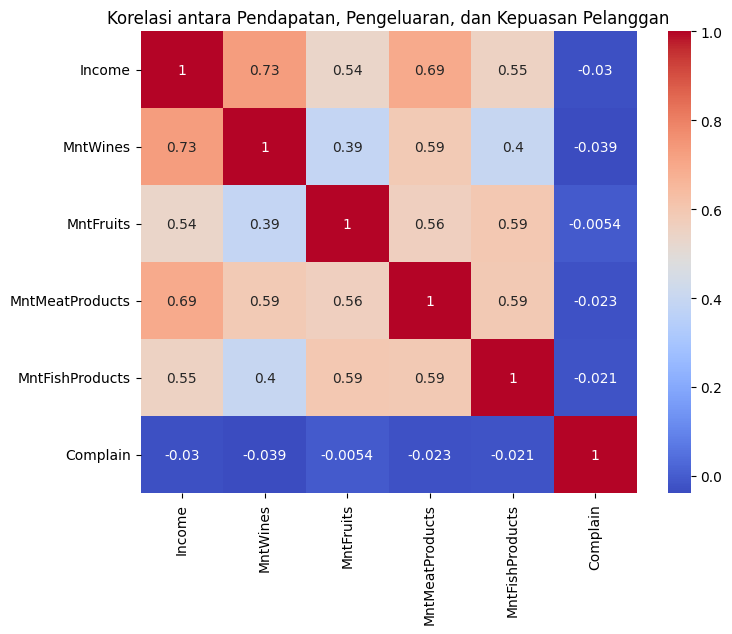

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Pendapatan, Pengeluaran, dan Kepuasan Pelanggan')
plt.show()


Kategori produk apa yang paling banyak dibeli, dan bagaimana pola pembelian dipengaruhi oleh pendapatan serta kepuasan pelanggan? Apakah pengaduan pelanggan berdampak pada loyalitas dan perilaku belanja?


**Interpretasi Hasil**
Pendapatan memiliki korelasi positif yang cukup kuat dengan beberapa jenis pengeluaran:

***1. Korelasi Pendapatan dengan Pengeluaran***
- **Korelasi Income dan MntWines**: 
  - Korelasi sebesar **0.73**, menunjukkan bahwa semakin tinggi pendapatan, semakin besar pengeluaran untuk produk anggur. Ini adalah korelasi positif yang kuat.
- **Korelasi Income dan MntMeatProducts**: 
  - Korelasi sebesar **0.69**, menunjukkan bahwa semakin tinggi pendapatan, semakin besar pengeluaran untuk produk daging. Ini juga menunjukkan hubungan yang cukup kuat.
- **Korelasi Income dan MntFruits**: 
  - Korelasi sebesar **0.54**, menunjukkan hubungan sedang.
- **Korelasi Income dan MntFishProducts**: 
  - Korelasi sebesar **0.55**, menunjukkan hubungan sedang.

***2. Korelasi Antar Pengeluaran Produk***
- **Korelasi antara MntFruits dan MntFishProducts**: 
  - Korelasi sebesar **0.59**, menunjukkan bahwa pelanggan yang banyak menghabiskan uang untuk produk buah cenderung juga menghabiskan lebih banyak untuk produk ikan.
- **Korelasi antara MntMeatProducts dan MntFishProducts**: 
  - Korelasi juga sebesar **0.59**, menunjukkan pola pengeluaran yang serupa antara kedua produk.

***3. Hubungan Complain (Keluhan)***
-  Korelasi antara **Complain** dan semua variabel lain mendekati **0** (nilai negatif yang sangat kecil), menunjukkan bahwa jumlah keluhan tidak berhubungan dengan variabel lain seperti pendapatan atau pengeluaran. 
- Ini mungkin mengindikasikan bahwa keluhan pelanggan tidak dipengaruhi oleh pendapatan mereka atau pengeluaran untuk produk tertentu.

**Rekomendasi**
1. *Melakuakan Personalisasi Iklan* Personalisasi yang dimaksud bisa dengan mengunakan Cluster, sejalan dengan rumusan masalah sebelumnya. dengan mengetahui tingkat konsumsi bedasarkan pendapatan ini dapat membantu untuk membuat personalisasi iklan
2. *Optimalisasi Pemasaran Produk Populer* menjadi langkah dengan memfokuskan pada kasus ini adalah wine dan daging sebagai produk unggulan dan minim dari complain
3. *Penawaran Diskon yang Sesuai* Menawarkan Diskon sesuai dengan target market yang telah di teliti. sehingga memicu peningkatan loyalitas bagi konsumen 
4. *Analisa Pengaduan Pelanggan* Mengumpulkan Umpan Balik dari Kampanye Pemasaran untuk optimalisasi dalam pemasaran


# **3. EFEKTIFITAS KAMPANYE PROMOSI**: 

Apakah kampanye diskon memiliki pengaruh signifikan terhadap perilaku belanja pelanggan? Apa strategi yang dapat diterapkan untuk meningkatkan efektivitas kampanye di masa mendatang?

### **Pengujian Rumusan Masalah**

Pada Kasus Kampanye Menggunakan Diskon ini diuji coba dengan menggunakan man whitneney U. diantara lain :
1. Alasan utamanya pada uji ini tidak memerlukan data dengan asumsi normalitas.
2. Membandingankan antara dua sampel independen dalam konteks ini adalah dengan diskon dan tanpa diskon, untuk mengevaluasi apakah signifikasi diantara penggunaan diskon atau tidak

In [28]:
# Menentukan pelanggan yang menerima diskon
df['discounted'] = df['AcceptedCmp1'].apply(lambda x: 1 if x > 0 else 0)

# Menghitung pengeluaran untuk produk anggur berdasarkan status diskon
discounted = df[df['discounted'] == 1]['MntWines']
not_discounted = df[df['discounted'] == 0]['MntWines']


In [29]:
from scipy.stats import mannwhitneyu

# Uji Mann-Whitney U
stat, p_value = mannwhitneyu(discounted, not_discounted)
print(f'Statistic: {stat}, p-value: {p_value}')

# Rata-rata pengeluaran
mean_discounted = discounted.mean()
mean_not_discounted = not_discounted.mean()
print(f'Rata-rata pengeluaran untuk pelanggan yang menerima diskon: {mean_discounted:.2f}')
print(f'Rata-rata pengeluaran untuk pelanggan yang tidak menerima diskon: {mean_not_discounted:.2f}')


Statistic: 258927.5, p-value: 6.195967520615632e-47
Rata-rata pengeluaran untuk pelanggan yang menerima diskon: 758.60
Rata-rata pengeluaran untuk pelanggan yang tidak menerima diskon: 272.70


**Pada Hasil Uji tersebut didapatkan :**

1. p-value yang kecil menandakan adanya Signifiakasi antara kedua pengujian dan relevan.
2. adanya Perbedaan Rata-Rata yang cukup Signifikan antara pengeluaran pelanggan yang menerima diskon dan yang tidak menerima diskon mencapai hampir 3x lebih banyak.

### **Contoh kasus pada pembelanjaan Anggur**

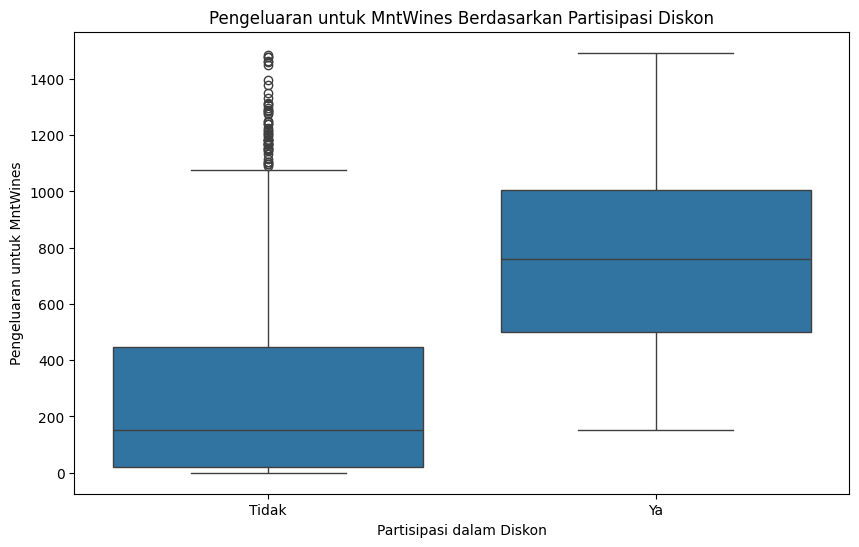

In [30]:
# Visualisasi boxplot untuk perbandingan pengeluaran
plt.figure(figsize=(10, 6))
sns.boxplot(x='discounted', y='MntWines', data=df)
plt.title('Pengeluaran untuk MntWines Berdasarkan Partisipasi Diskon')
plt.xlabel('Partisipasi dalam Diskon')
plt.ylabel('Pengeluaran untuk MntWines')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()


#### **Interpretasi Boxplot Pengeluaran untuk MntWines Berdasarkan Partisipasi Diskon**

Boxplot di atas menunjukkan perbandingan pengeluaran pelanggan pada kategori **MntWines** (pengeluaran untuk anggur) berdasarkan partisipasi dalam kampanye diskon. 

***Analisis Hasil Visualisasi***

1. **Kelompok 'Tidak' (Partisipasi dalam Diskon)**:
   - Rata-rata pengeluaran untuk kelompok pelanggan yang **tidak berpartisipasi** dalam diskon cenderung lebih rendah. 
   - Boxplot ini menunjukkan median pengeluaran yang terletak di bawah 500, yang menggambarkan bahwa mayoritas dari kelompok ini tidak menghabiskan banyak untuk produk anggur.
   - **Outlier**: Munculnya titik-titik di atas whiskers menunjukkan bahwa ada beberapa pelanggan yang mengeluarkan pengeluaran yang jauh lebih tinggi, tetapi secara keseluruhan, kelompok ini memiliki pengeluaran yang jauh lebih rendah.

2. **Kelompok 'Ya' (Partisipasi dalam Diskon)**:
   - Dalam kelompok yang **berpartisipasi**, median pengeluaran menunjukkan bahwa pelanggan rata-rata menghabiskan lebih dari 1000 untuk MntWines.
   - Boxplot menunjukkan bahwa interquartile range (IQR) dari kelompok ini lebih besar, yang berarti ada lebih banyak variasi dalam pengeluaran untuk pelanggan yang berpartisipasi dalam diskon.
   - Sangat sedikit outlier yang teramati, yang menunjukkan bahwa pelanggan di kelompok ini tidak hanya lebih banyak berbelanja, tetapi juga memiliki konsistensi dalam pengeluaran yang lebih tinggi untuk produk anggur.

***Kesimpulan***
Visualisasi ini secara jelas menunjukkan bahwa pelanggan yang berpartisipasi dalam diskon cenderung menghabiskan lebih banyak untuk produk anggur dibandingkan dengan mereka yang tidak berpartisipasi. Hal ini menguatkan hasil dari analisis sebelumnya yang menyatakan bahwa penawaran diskon memiliki pengaruh signifikan terhadap perilaku belanja pelanggan.

***Rekomendasi***
- **Perkuat Kampanye Diskon**: Dengan melihat efektivitas diskon pada pengeluaran, Supermarket XYZ disarankan untuk terus menawarkan tawaran menarik untuk produk yang populer seperti anggur, guna meningkatkan partisipasi dan pengeluaran pelanggan.
- **Lakukan Sosialisasi**: Selalu penting untuk mengkomunikasikan tawaran diskon dan insentif kepada pelanggan secara efektif, untuk meningkatkan kemungkinan mereka berpartisipasi dalam kampanye di masa mendatang.


# **KESIMPULAN ANALIS DAN REKOMENDASI**

## Kesimpulan Analisis

1. **Segmentasi Pelanggan**:
   - Hasil clusterisasi yang dilakukan menunjukkan adanya variasi yang signifikan dalam perilaku pelanggan berdasarkan pengeluaran dan pendapatan. Pelanggan dalam cluster yang lebih aktif cenderung mempunyai **pendapatan lebih tinggi** dan **frekuensi pembelian yang lebih sering**, yang menandakan bahwa segmentasi ini dapat membantu dalam merancang kampanye yang lebih efektif dan terfokus.

2. **Pengaruh Kampanye Promosi**:
   - Berdasarkan hasil uji statistik Mann-Whitney U, terbukti bahwa pelanggan yang berpartisipasi dalam kampanye diskon memiliki **pengeluaran yang secara signifikan lebih tinggi** dibandingkan dengan pelanggan yang tidak turut serta. Penemuan ini menunjukkan bahwa tawaran diskon membuat pelanggan lebih terdorong untuk berbelanja, yang mengindikasikan efektivitas kampanye promosi di Supermarket XYZ.

3. **Preferensi Produk**:
   - Analisis pengeluaran per kategori produk mengungkapkan bahwa pelanggan memiliki preferensi tertentu, terutama terhadap produk anggur dan daging. Tingginya rata-rata pengeluaran di kategori-kategori ini menunjukkan bahwa Supermarket XYZ harus memperkuat penawaran dan promosi di segmen produk yang paling diminati untuk menarik lebih banyak pelanggan.



## Rekomendasi

1. **Optimalisasi Strategi Pemasaran**:
   - Supermarket XYZ sebaiknya merancang kampanye pemasaran yang lebih terfokus berdasarkan hasil segmentasi. Misalnya, tawarkan promosi khusus untuk pelanggan dalam cluster dengan pendapatan tinggi untuk produk premium.

2. **Tingkatkan Komunikasi dan Kesadaran**:
   - Penguatan komunikasi mengenai penawaran diskon melalui berbagai saluran pemasaran (media sosial, email, dan iklan langsung) agar pelanggan lebih sadar dan terdorong untuk berpartisipasi dalam kampanye.

3. **Personalisasi Penawaran Produk**:
   - Sesuaikan penawaran diskon pada produk yang menunjukkan pengeluaran tinggi, seperti anggur dan daging, untuk meningkatkan relevansi dan efektivitas penawaran, serta menarik lebih banyak pelanggan.

4. **Berikan Program Loyalitas**:
   - Kembangkan program loyalitas untuk meningkatkan keterlibatan pelanggan yang sering berbelanja. Hal ini dapat membantu membangun hubungan jangka panjang dengan pelanggan dan mendorong mereka untuk kembali berbelanja di masa depan.

### Kesimpulan Akhir
Dengan mengikuti rekomendasi berdasarkan analisis yang dilakukan, Supermarket XYZ dapat meningkatkan partisipasi dalam kampanye promosi, memperkuat keterlibatan pelanggan, dan pada akhirnya meningkatkan pendapatan penjualan. Pendekatan berbasis data ini memungkinkan supermarket untuk lebih memahami dan memenuhi kebutuhan pelanggan di pasar yang kompetitif ini.
